# Importing Libraries

In [1]:
# Importing the necessary libraries
import numpy as np  # For numerical computations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
plt.style.use('fivethirtyeight')
import seaborn as sns  # For enhanced data visualizations
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical data and scaling features
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets


from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.svm import SVC  # Support Vector Classifier (SVC) model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest Classifier & Gradient Boosting Classifier model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Metrics for evaluating model performance

import joblib  # For saving the best model

import warnings  #to manage warning messages
warnings.filterwarnings('ignore')  # Ignoring all warnings

# EDA and Preprocessing

## Read Data

In [121]:
# Reading the application dataset
application_data = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/application_record.csv') 

# Reading the credit dataset
credit_data = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv') 

## EDA

In [122]:
# Function to explore datasets
def explore_data(df):
    print("info of the df : ")
    print(df.info())
    print('*'*100)

    print("Missing Values in the df:\n")
    print(df.isnull().sum())
    print('*'*100)

    print("shape of the df : ")
    print(df.shape)

In [123]:
explore_data(application_data)

info of the df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15 

In [124]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [125]:
print("describtion of the application data : ")
application_data.describe(include='all')

describtion of the application data : 


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [126]:
explore_data(credit_data)

info of the df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
****************************************************************************************************
Missing Values in the df:

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
****************************************************************************************************
shape of the df : 
(1048575, 3)


In [127]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [128]:
print("describtion of the credit data : ")
credit_data.describe(include='all')

describtion of the credit data : 


,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [129]:
# Function to calculate unique count of values in each column
def unique_count(df):
    # Iterating over each column in the DataFrame
    for i in df.columns:
        # Calculating the number of unique values in the current column
        count = df[i].nunique()
        print(i, ": ", count)

In [130]:
unique_count(application_data)

ID :  438510
CODE_GENDER :  2
FLAG_OWN_CAR :  2
FLAG_OWN_REALTY :  2
CNT_CHILDREN :  12
AMT_INCOME_TOTAL :  866
NAME_INCOME_TYPE :  5
NAME_EDUCATION_TYPE :  5
NAME_FAMILY_STATUS :  5
NAME_HOUSING_TYPE :  6
DAYS_BIRTH :  16379
DAYS_EMPLOYED :  9406
FLAG_MOBIL :  1
FLAG_WORK_PHONE :  2
FLAG_PHONE :  2
FLAG_EMAIL :  2
OCCUPATION_TYPE :  18
CNT_FAM_MEMBERS :  13


In [131]:
unique_count(credit_data)

ID :  45985
MONTHS_BALANCE :  61
STATUS :  8


## Feature Engineering

In [147]:
# Function to perform feature engineering
def feature_engineering(application_data, credit_data):
    
    # Aggregating payment history
    credit_data['STATUS_NUMERIC'] = credit_data['STATUS'].replace({'X': -1, 'C': -1}).apply(pd.to_numeric, errors='coerce')

    # Aggregating based on 'ID' (assuming we want to group by 'ID' for each applicant)
    credit_agg = credit_data.groupby('ID').agg(
        # The worst status is the maximum value of the numeric status (most severe status).
        worst_status=('STATUS_NUMERIC', 'max'),
        
        # Count the number of times the applicant was on time (i.e., 'STATUS' is '0').
        num_on_time=('STATUS', lambda x: (x == '0').sum()),
        
        # Count the number of late payments, where 'STATUS_NUMERIC' > 0.
        num_late=('STATUS_NUMERIC', lambda x: (x > 0).sum()),
        
        # Count the number of closed accounts, where 'STATUS' is 'C'.
        num_closed=('STATUS', lambda x: (x == 'C').sum()),
        
        # Calculate the credit history length by finding the range of the 'MONTHS_BALANCE' values.
        credit_history_length=('MONTHS_BALANCE', lambda x: x.max() - x.min())
    ).reset_index()
    
    # Merge datasets on 'ID'
    merged_data = pd.merge(application_data, credit_agg, on='ID', how='inner')

    # Extracting numerical ranges from categorical data
    if 'DAYS_BIRTH' in merged_data.columns:
        merged_data['AGE'] = (-merged_data['DAYS_BIRTH']) // 365  # Convert negative days to positive years
    if 'DAYS_EMPLOYED' in merged_data.columns:
        merged_data['YEARS_EMPLOYED'] = (-merged_data['DAYS_EMPLOYED']) // 365  # Convert days to years
        merged_data.drop('DAYS_EMPLOYED', axis=1, inplace=True)  # Drop original column
    
    print("Feature Engineering Completed.")
    
    return merged_data

In [148]:
# Perform feature engineering 
merged_data = feature_engineering(application_data, credit_data) 
merged_data.head(5)

Feature Engineering Completed.


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,worst_status,num_on_time,num_late,num_closed,credit_history_length,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,1,1,1,13,15,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,1,1,1,12,14,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,7,0,7,29,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,2,0,0,4,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,-1,0,0,0,4,52,8


## Data Preprocessing

In [152]:
def data_preprocessing(merged_data):
    # Dropping redundant columns
    redundant_cols = ['DAYS_BIRTH', 'ID']
    merged_data.drop(columns=[col for col in redundant_cols if col in merged_data.columns], inplace=True)
    
    # Encoding categorical columns
    categorical_cols = merged_data.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        merged_data[col] = encoder.fit_transform(merged_data[col])

    # Verify target column existence
    merged_data['TARGET'] = (merged_data['worst_status'] > 2).astype(int)  # Example logic for target creation


    # Splitting data into features and target
    X = merged_data.drop('TARGET', axis=1, errors='ignore')
    y = merged_data['TARGET']

    print("Data Preprocessing Completed.")
    return X, y

In [153]:
# Perform data preprocessing
X, y = data_preprocessing(merged_data)

Data Preprocessing Completed.


## Data Scaling

In [154]:
# Scaling Model
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Spliting Data into Train & Test

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [156]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (29165, 22)
Shape of y_train: (29165,)


# Modeling 

In [157]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=123)
svc_model = SVC(probability=True, random_state=123)
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier(random_state=123)
random_forest_model = RandomForestClassifier(random_state=123)
gradient_boosting_model = GradientBoostingClassifier(random_state=123)

In [158]:
# Dictionary to store models and their names
models = {
    "Logistic Regression": logistic_model,
    "Support Vector Classifier": svc_model,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree Classifier": decision_tree_model,
    "Random Forest Classifier": random_forest_model,
    "Gradient Boosting Classifier": gradient_boosting_model
}


Training Logistic Regression...
Logistic Regression Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      1.00      1.00        60

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   0   60]]


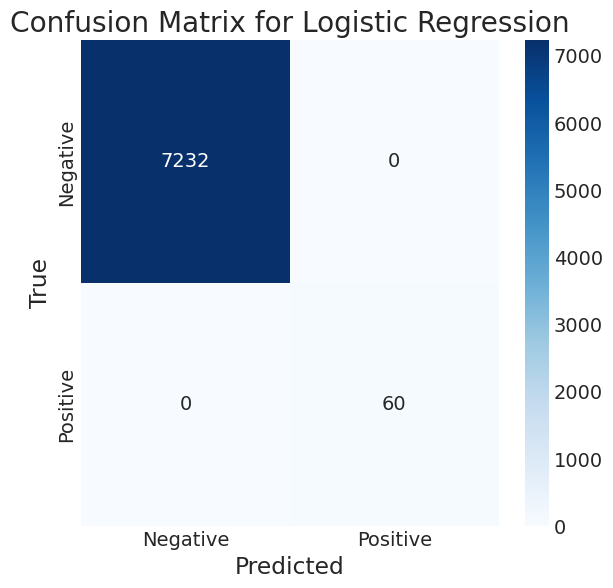


Training SVM...
SVM Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      0.98      0.99        60

    accuracy                           1.00      7292
   macro avg       1.00      0.99      1.00      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   1   59]]


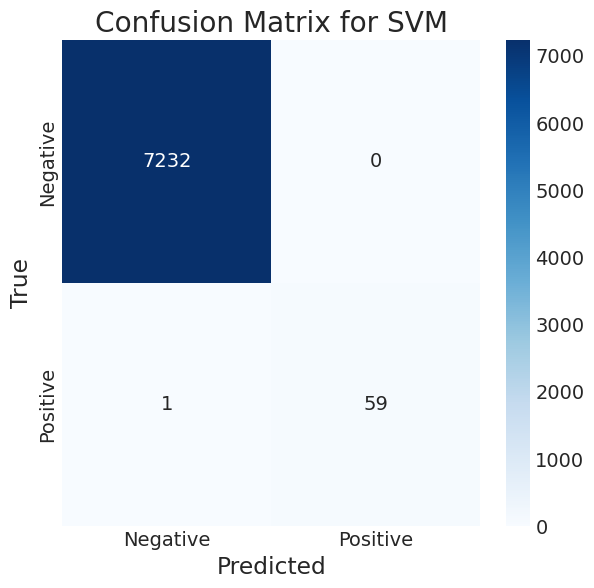


Training KNN...
KNN Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      0.90      0.95        60

    accuracy                           1.00      7292
   macro avg       1.00      0.95      0.97      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   6   54]]


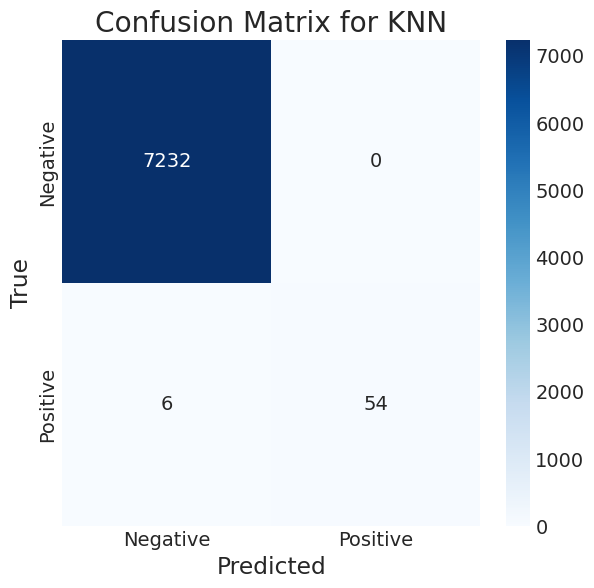


Training Decision Tree...
Decision Tree Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      1.00      1.00        60

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   0   60]]


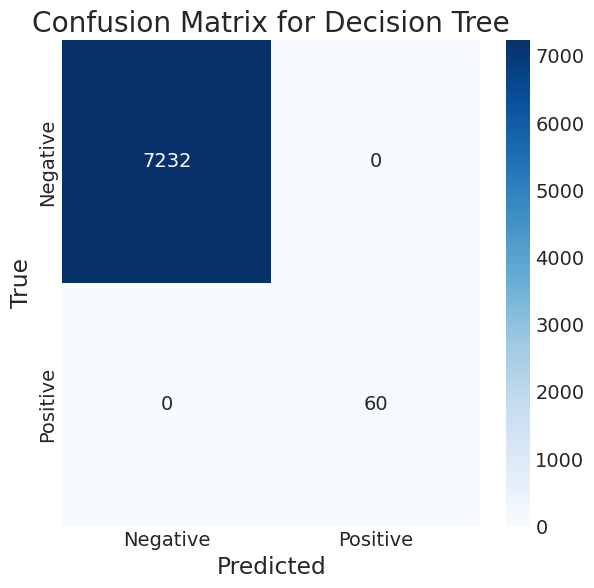


Training Random Forest...
Random Forest Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      1.00      1.00        60

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   0   60]]


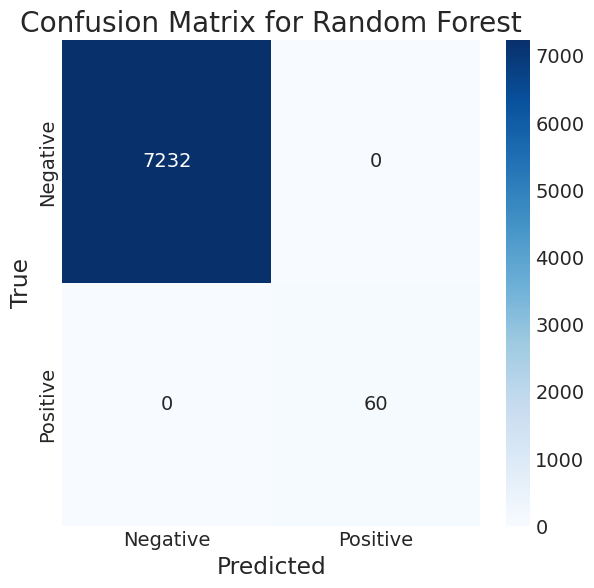


Training Gradient Boosting...
Gradient Boosting Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      1.00      1.00        60

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292

Confusion Matrix:
[[7232    0]
 [   0   60]]


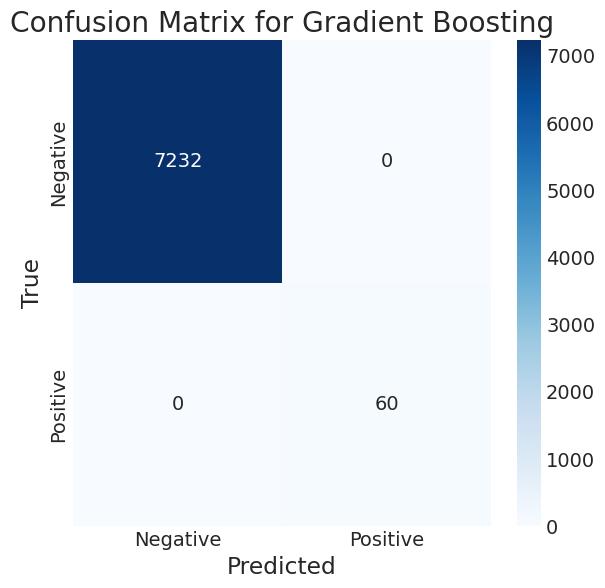

In [164]:
# Track best model
best_model = None
best_accuracy = 0
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy  # Store accuracy
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Update best model if this one performs better
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy


In [160]:
# Print summary of results
print("\nSummary of Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Summary of Model Performance:
Logistic Regression: 1.0000
Support Vector Classifier: 0.9999
K-Nearest Neighbors: 0.9992
Decision Tree Classifier: 1.0000
Random Forest Classifier: 1.0000
Gradient Boosting Classifier: 1.0000


In [161]:
# Print the best model
print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy:.4f}")


Best Model: LogisticRegression with Accuracy: 1.0000


In [162]:
# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


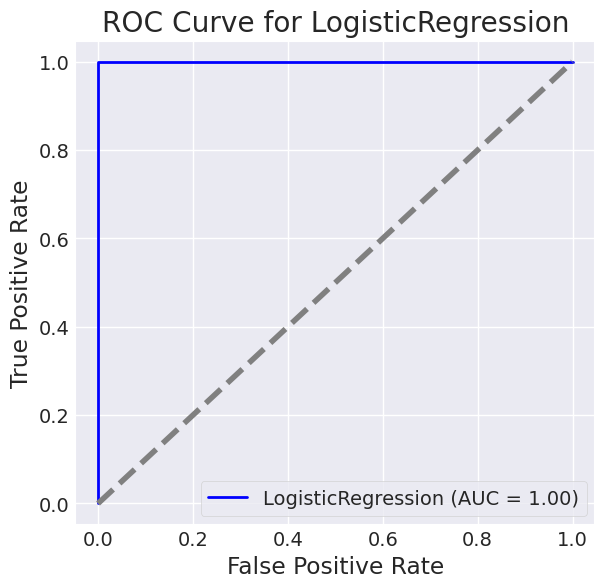

In [165]:
# Plot ROC Curve for the best model (if binary classification)
if len(set(y_test)) == 2:  # Only for binary classification
    from sklearn.metrics import roc_curve, auc
    
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{type(best_model).__name__} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {type(best_model).__name__}')
    plt.legend(loc='lower right')
    plt.show()